## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 13 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
## summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Observations And Insights


## Data Cleaning

In [12]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [7]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [10]:
df['Reviews'].str.isnumeric().sum()

10840

In [14]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
## Converting cell into it's numeric structure
df['Reviews'].iloc[10472] = 3000000

In [33]:
df['Reviews'] = df['Reviews'].astype('Int64')

In [30]:
type(df['Reviews'].iloc[10472])

numpy.int32

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [35]:
## cleaning size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [36]:
df['Size'].isnull().sum()

0

In [40]:
df['Size'] = df['Size'].str.replace('M', '000')
df['Size'] = df['Size'].str.replace('k', '')
df['Size'] = df['Size'].replace('Varies with device' , np.nan)
df['Size'] = df['Size'].astype(float)



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  Int64  
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(1), float64(2), object(10)
memory usage: 1.1+ MB


In [42]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

In [43]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 3000000], dtype=object)

In [44]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 3000000, '$1.20', '$1.04'], dtype=object)

In [45]:
chars_to_remove = ['+' , ',' , '$']
cols_to_clean = ['Price' , 'Installs' ]
for item in chars_to_remove:
    for col in cols_to_clean:
        df[col]= df[col].str.replace(item , '')

In [46]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', nan,
       '1.20', '1.04'], dtype=object)

In [47]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

In [56]:
df['Installs'] = df['Installs'].astype(float)
df['Price'] = df['Price'].astype(float)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  Int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: Int64(1), float64(4), object(8)
memory usage: 1.1+ MB


In [58]:
## Handling Last Update Feature
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [80]:
## Converting Feature to DateTime
df['Last Updated'] = pd.to_datetime(df['Last Updated'] , errors='coerce')
df['Last_Updated_Day'] = df['Last Updated'].dt.day
df['Last_Updated_Month'] = df['Last Updated'].dt.month
df['Last_Updated_Year'] = df['Last Updated'].dt.year


In [88]:
df.drop(columns=['Day' , 'Month' , 'Year'] , inplace=True)

In [82]:
df.drop(columns=['Last Updated'] , inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10841 non-null  object 
 1   Category            10841 non-null  object 
 2   Rating              9367 non-null   float64
 3   Reviews             10841 non-null  Int64  
 4   Size                9145 non-null   float64
 5   Installs            10840 non-null  float64
 6   Type                10840 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10841 non-null  object 
 9   Genres              10841 non-null  object 
 10  Current Ver         10833 non-null  object 
 11  Android Ver         10839 non-null  object 
 12  Last_Updated_Day    10840 non-null  float64
 13  Last_Updated_Month  10840 non-null  float64
 14  Last_Updated_Year   10840 non-null  float64
dtypes: Int64(1), float64(7), object(7)
memory usage: 1.3+

In [90]:
df.to_csv('Data/google_Cleaned.csv')

## EDA

In [91]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20.0,6.0,2018.0


In [92]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26.0,2.0,2018.0
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,31.0,7.0,2018.0
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24.0,7.0,2018.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20.0,7.0,2018.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25.0,2.0,2016.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,5.2,5.0 and up,6.0,7.0,2018.0
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24.0,3.0,2018.0
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30.0,7.0,2018.0


In [93]:
df[df.duplicated('App')].shape

(1181, 15)

## observation
The Dataset has Duplicates

In [94]:
df.drop_duplicates(subset=['App'] , keep='first' , inplace=True) ## first -> for setting one Ocuurence

In [95]:
df.shape

(9660, 15)

## Explore Data

In [98]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## Print Columns
print('We have {} numerical features : {}'.format(len(numeric_features) , numeric_features))
print('\nWe have {} Categorical features : {}'.format(len(categorical_features) , categorical_features))



We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated_Day', 'Last_Updated_Month', 'Last_Updated_Year']

We have 7 Categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [100]:
## Proportion of Count Data on Categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------------------------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010352
CK Pharmacies                                     0.010352
CK Call NEW                                       0.010352
Ck Coif                                           0.010352
CONTRACT KILLER: ZOMBIES                          0.010352
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010352
Dance School Stories - Dance Dreams Come True     0.010352
3D Bowling                                        0.010352
Mind Games Pro                                    0.010352
iHoroscope - 2018 Daily Horoscope & Astrology     0.010352
Name: proportion, Length: 9660, dtype: float64
---------------------------------------------------------------------
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY           

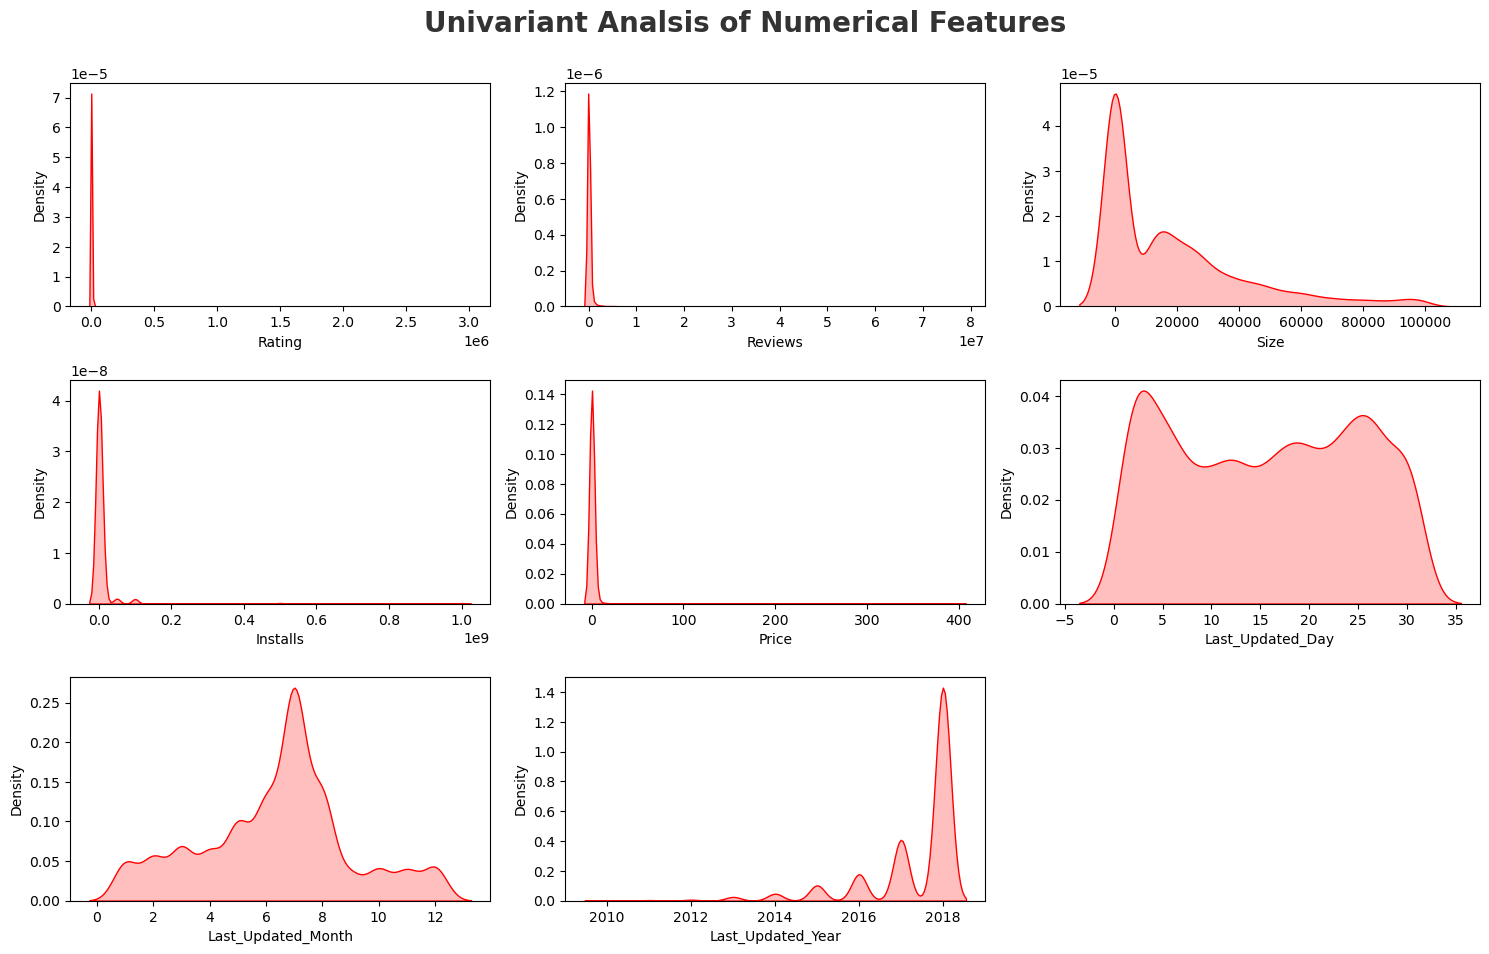

In [101]:
## Proportion of Count Data on numerical columns
plt.figure(figsize=(15 , 15))
plt.suptitle('Univariant Analsis of Numerical Features' , fontsize = 20 , fontweight = 'bold' , alpha = 0.8  , y = 1. )

for i in range(0 , len(numeric_features)):
    plt.subplot(5 , 3 , i + 1)
    sns.kdeplot(x = df[numeric_features[i]] , shade = True , color='r') ## kde => kenel density estimator plot
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


## observation
Year is left-Skewed while Size  is right-skewed

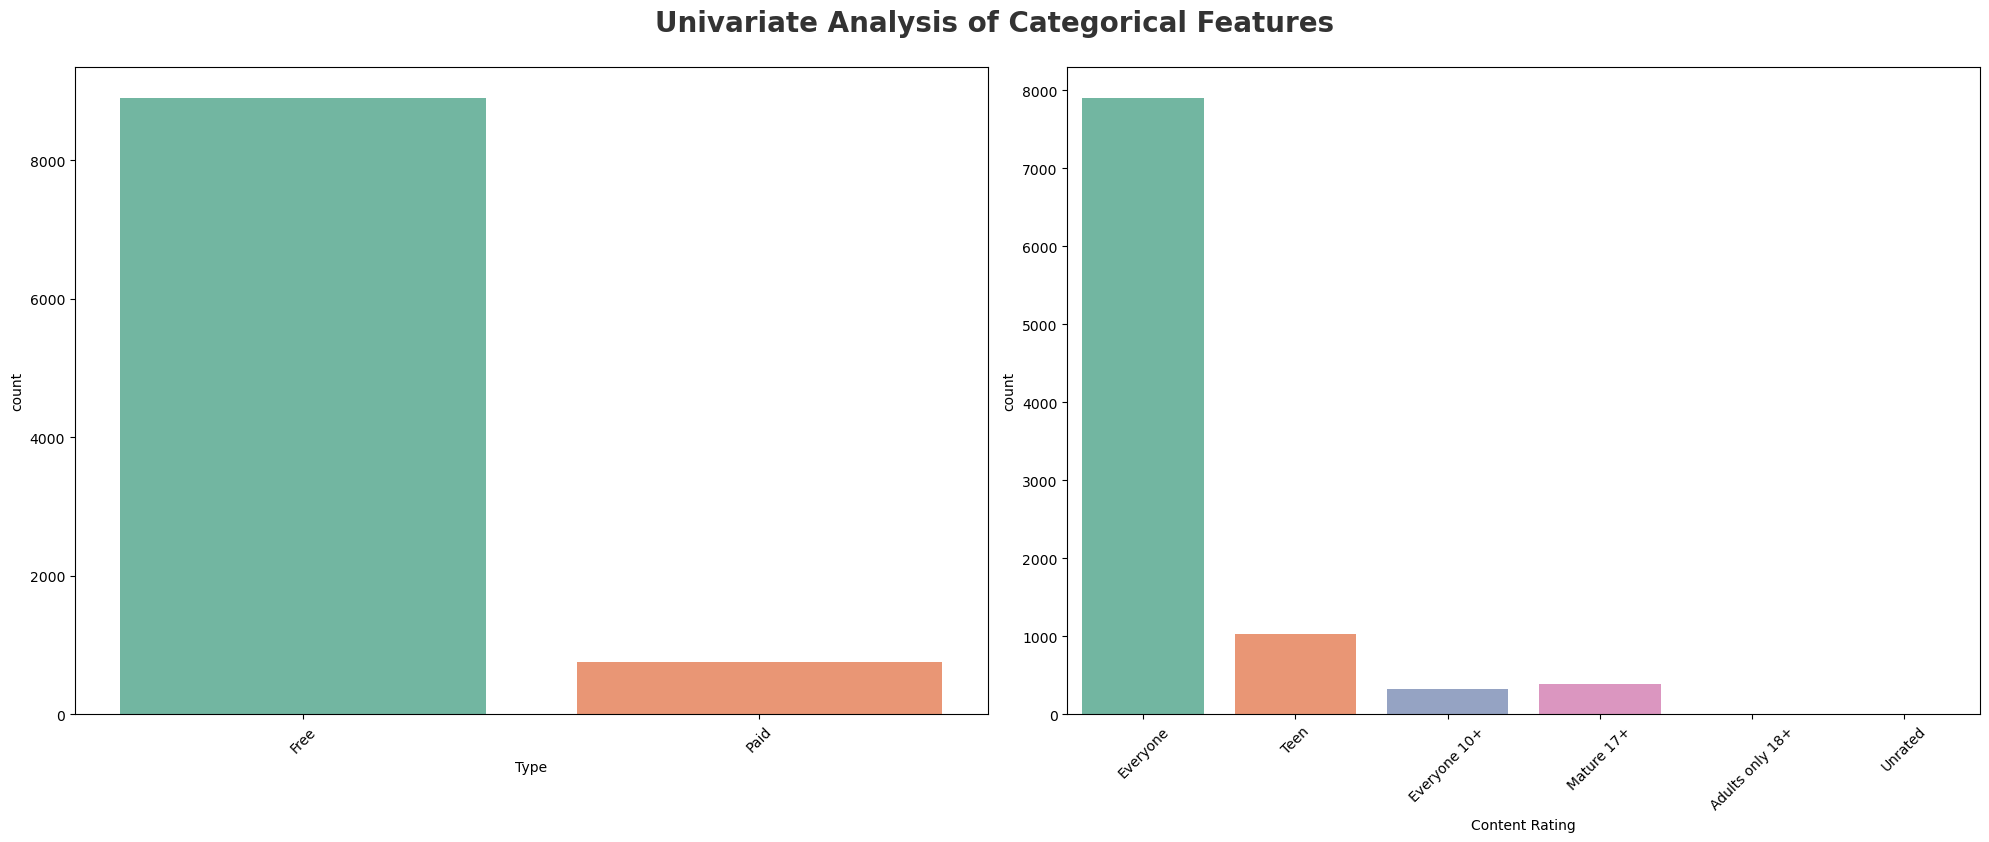

In [113]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the Most popular App Category

In [114]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


<Axes: ylabel='count'>

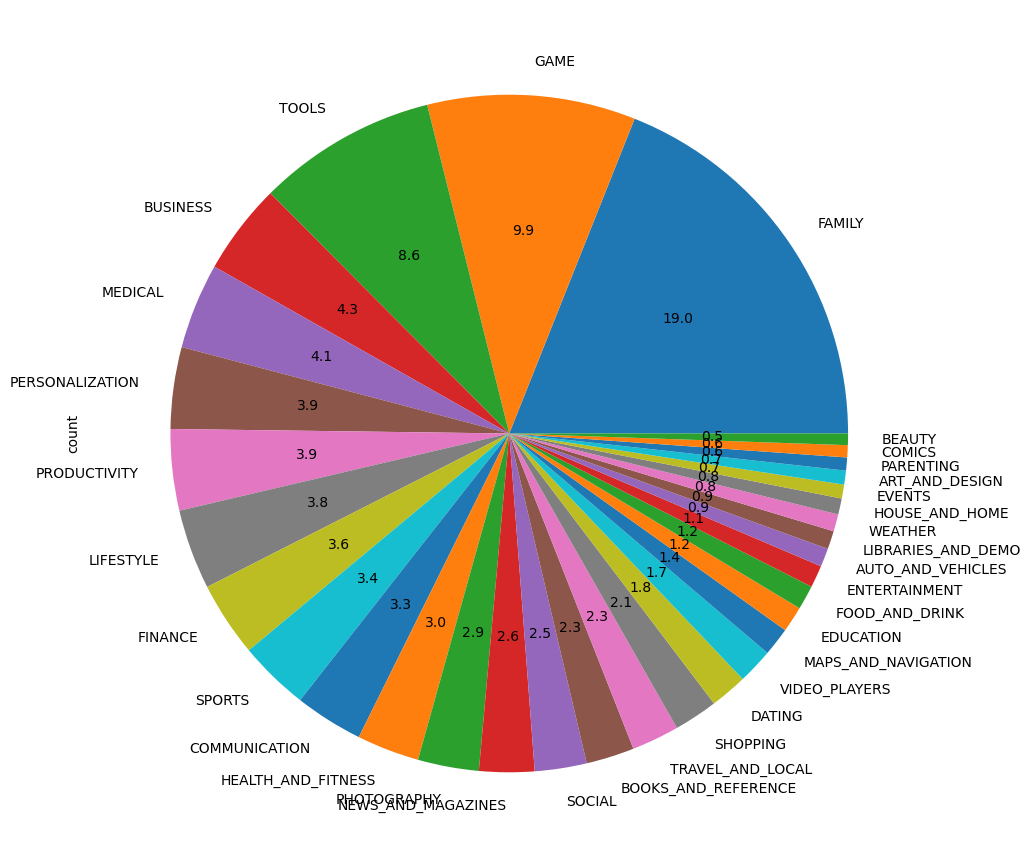

In [115]:
df['Category'].value_counts().plot.pie(y = df['Category'] , figsize=(15 , 11)  , autopct = '%1.1f')

## Observation
1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore


In [116]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts()) ## DataFrame of apps on the basis of category
category.rename(columns= {'Category' : 'Count'} , inplace=True)

In [117]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


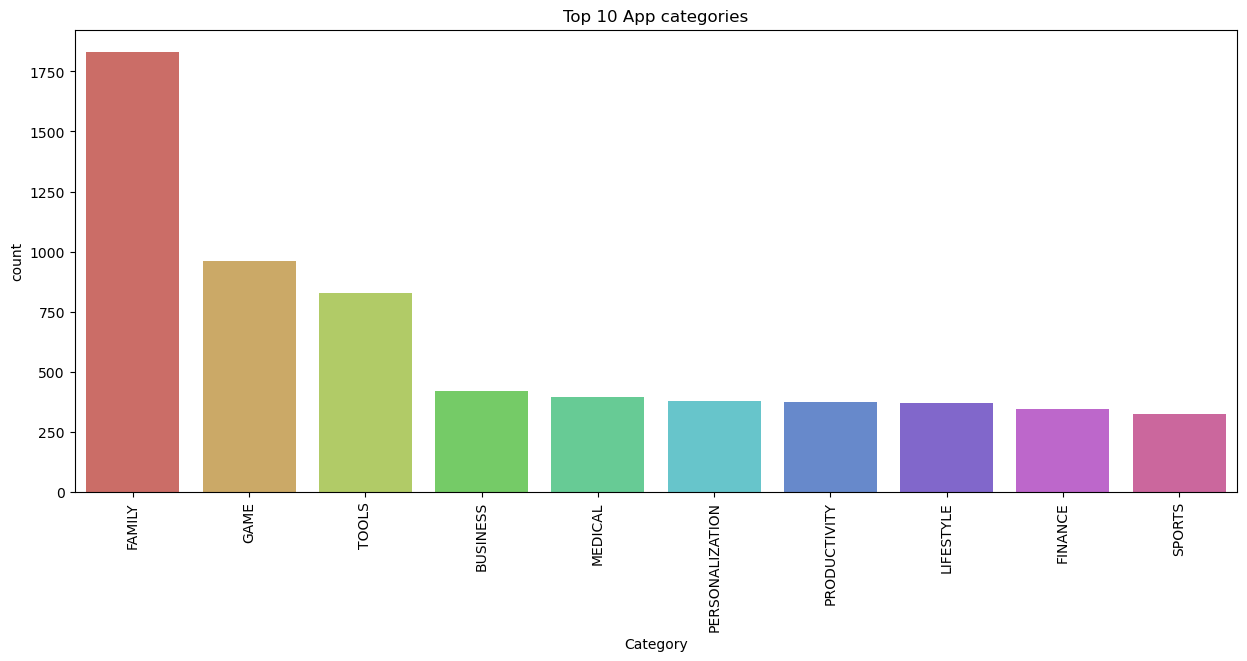

In [122]:
## Top 10 App Categories
plt.figure(figsize=(15 , 6))
sns.barplot(x = category.index[:10] , y = 'count' , data = category[:10] , palette = 'hls')
plt.title('Top 10 App categories')
plt.xticks(rotation = 90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [123]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


## 1. Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

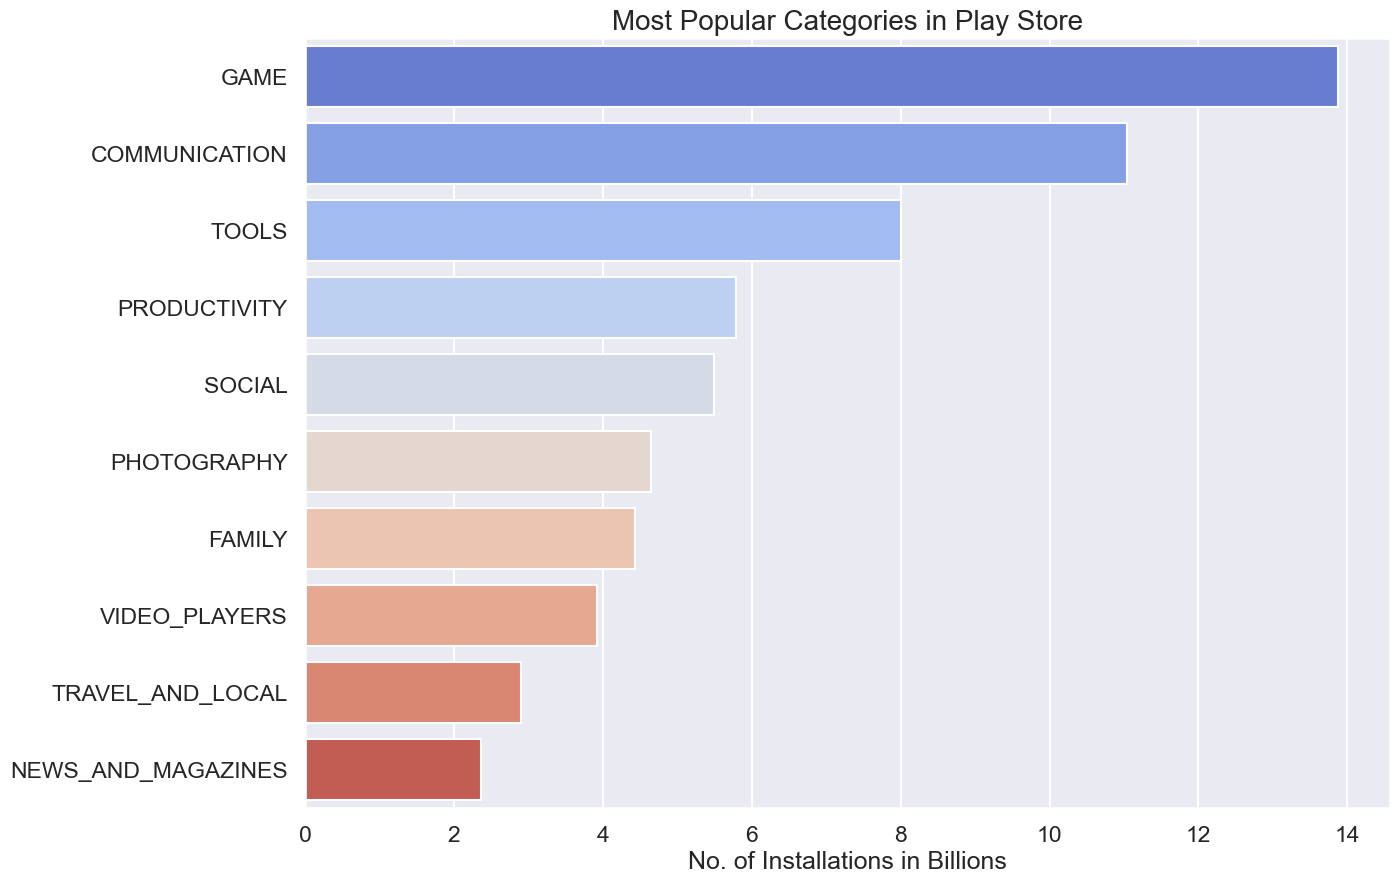

In [142]:
## 1. Which Category has largest number of installations??
## 1 group by category
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs / 1000000000 ## Converting into Billions

df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2  , palette="coolwarm")
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)




## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 19 Billion Installations GAME is the most popular Category in Google App store

## 2. What are the Top 5 most installed Apps in Each popular Categories ??


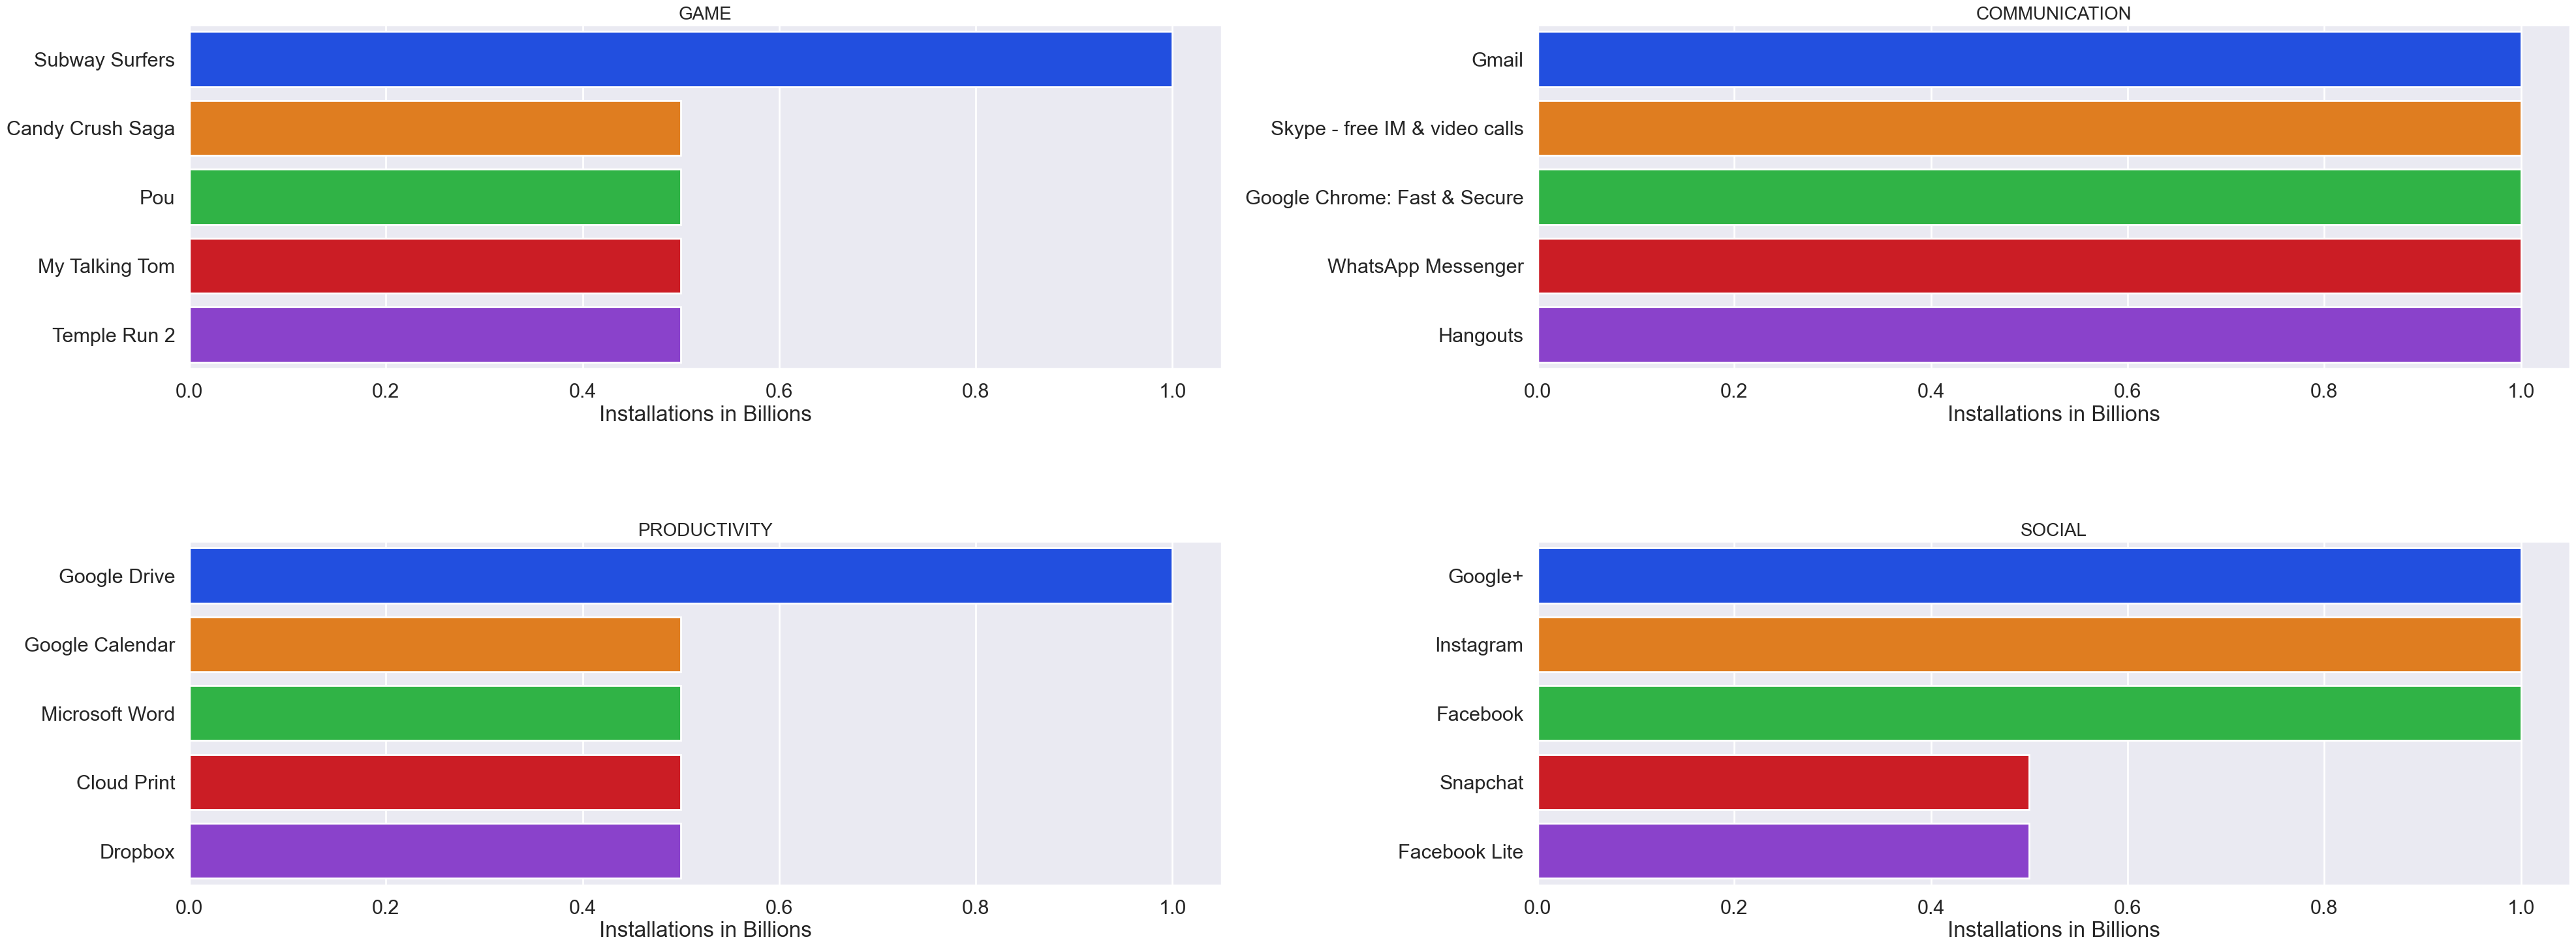

In [152]:
df_Five_installed_Apps_InEach_categoroies = df.groupby(['App' , 'Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

df_Five_installed_Apps_InEach_categoroies.Installs = df_Five_installed_Apps_InEach_categoroies.Installs / 1000000000

apps = ['GAME' , 'COMMUNICATION'  , 'PRODUCTIVITY' , 'SOCIAL']
sns.set_context('poster')
sns.set_style('darkgrid')

plt.figure(figsize=(40 , 30))
## enumerate loop over collection with index provider
for i , app in enumerate(apps):
    df2 = df_Five_installed_Apps_InEach_categoroies[df_Five_installed_Apps_InEach_categoroies.Category == app]
    df3 = df2.head(5)
    plt.subplot(4 , 2 , i+ 1)
    sns.barplot(data=df3 , x = "Installs" , y="App" , palette='bright')
    plt.xlabel("Installations in Billions")
    plt.ylabel('')
    plt.title(app , size = 20)


plt.tight_layout() ## prevent overlapping between elements
plt.subplots_adjust(hspace=.5) ## adds vertical Spacing
plt.show()


    


## Insights
- Most popular game is Subway Surfers.
- one of the most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- one of the most social app is Instagram.

3. How many apps are there on Google Play Store which get 5 ratings??

In [154]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [159]:
rating = df.groupby(['Category' , 'Installs' , 'App'])['Rating'].sum().sort_values(ascending=False).reset_index()

top_rating_apps = rating[rating.Rating == 5.0]
print(f'Number of 5 Rating Apps are ' , top_rating_apps.shape[0])
top_rating_apps.head(2)

Number of 5 Rating Apps are  271


,Category,Installs,App,Rating
0,FAMILY,1000.0,CS & IT Interview Questions,5.0
1,DATING,100.0,Online Girls Chat Group,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CS & IT Interview Question' from 'Family' Category